# System Description and Analysis

This notebook models a simple spring loaded weapon system with two arm segments, one with the spring mounted to it and the other with the weapon mounted to it. The two arm segments have a fixed angle between them, and will have separate linear densities that, for the purposes of this model, are assumed to be constant. The spring arm has length $l_s$ and a linear density of $\lambda_s$. The weapon arm has a length of $l_w$ and a linear density of $\lambda_w$. The weapon itself has a mass of $m$ and a radius of $r$. The spring itself has a resting length of $l_r$ and a spring constant of $k$. Additionally, the spring is mounted in such the way that the length of the spring at its minimum throughout the rotation of the spring arm, $l_{min}$, is constrained be the inequality $l_r \le l_{min} \le 2 \left( l_r - l_s \right)$. The weapon is modeled as a disk with a constant density, a radius $r$ and a mass of $m$. Additionally, since the forces from the spring will be so high, the effects of gravity can be safely neglected.

In operation, the weapon system will be loaded by pulling the spring arm back so that the spring is at its maximum length, $l_{max}$. The spring arm will then be released, causing the spring to pull the weapon arm forward, transforming the elastic potential energy stored in the spring into rotational kinetic energy and driving the weapon system into the enemy robot at high speed. The goal of this model is to determine the optimal values of $l_s$, $l_r$, $l_{min}$, and $k$ for any given values of $\lambda_s$, $\lambda_w$, $l_w$, $m$, and $r$ that will yield a tip velocity greater than or equal to some minimum value, $v_{min}$, while minimizing the maximum torque $\tau$, radial force $F_r$, and angular force $F_\theta$ experienced by the spring arm throughout the entire rotation from its fully loaded loaded position to impact. For the following equations, $l_{min}$ will occur at $\theta = 0$ and $l_{max}$ will occur at $\theta = \pi$.

## Calculating Torque

Since this is a relatively complicated system in a radial coordinate system, it will be modeled using Lagrangian mechanics. The general form of the Lagrangian is given by Equation 1 below, where $L$ is the Lagrangian, $T$ is the kinetic energy, $U$ is the potential energy, and $\omega = \frac{d \theta}{dt}$ is the angular velocity of the spring arm.

\begin{equation}
\tag{1}
\mathcal{L}(\theta, \omega) = T(\theta, \omega) - U(\theta, \omega)
\end{equation}

In the case of this system, the kinetic energy is caused entirely by the rotational motion of the spring arm, weapon arm, and weapon disk and the potential energy is caused entirely by the elastic potential energy stored in the spring. However, in order to calculate the kinetic energy of the spring arm it is necessary to know the moment of inertia of the weapon system. This is given in Equation 2.

\begin{equation}
\tag{2}
I = \frac{1}{3} \lambda_s l_s^3 + \frac{1}{3} \lambda_w l_w^3 + \frac{1}{2} m r^2 + m l_w^2
\end{equation}

The kinetic energy of the spring arm is given by Equation 3.

\begin{equation}
\tag{3}
T(\theta, \omega) = \frac{1}{2} I \omega^2
\end{equation}

To calculate the potential energy of the spring, the length of the spring at any given angle $\theta$ must be calculated first. This is given by Equation 4.

\begin{equation}
\tag{4}
L(\theta) = \sqrt{l_s^2 + (l_s + l_{min})^2 - 2 l_s (l_s + l_{min}) \cos(\theta)}
\end{equation}

Once Equation 4 is found, it is possible to find the potential energy stored in the spring as shown in Equation 5.

\begin{equation}
\tag{5}
U(\theta, \omega) = \frac{1}{2} k \left( L(\theta) - l_r \right)^2
\end{equation}

Next, the partial derivative's of the Lagrangian with respect to $\theta$ and $\omega$ must be found. These are given by Equations 6 and 7.

\begin{equation}
\tag{6}
\frac{\partial \mathcal{L}}{\partial \theta} = -\frac{k l_s (l_s + l_{min}) \sin(\theta) \left( L(\theta) - l_r \right)}{L(\theta)}

\end{equation}

\begin{equation}
\tag{7}
\frac{\partial \mathcal{L}}{\partial \omega} = I \omega
\end{equation}

From these two equations, the full Euler-Lagrange equation can be found as shown in Equation 8, where $\alpha = \frac{d \omega}{dt}$ is the angular acceleration of the spring arm.

\begin{equation}
\tag{8}
I \alpha = -\frac{k l_s (l_s + l_{min}) \sin(\theta) \left( L(\theta) - l_r \right)}{L(\theta)}
\end{equation}

And since torque is defined as the moment of inertia times the angular acceleration, Equation 8 can be rewritten as Equation 9 to solve for the torque at any given angle $\theta$.

\begin{equation}
\tag{9}
\tau(\theta) = -\frac{k l_s \sin(\theta) (l_s + l_{min}) \left( L(\theta) - l_r \right)}{L(\theta)}
\end{equation}

## Calculating Radial and Angular Forces

Since the spring force is conservative and dependant only on the position of the spring arm, it is possible to calculate the magnitude of the total force exerted by the spring on the spring arm at any given angle $\theta$ by subtracting the resting length of the spring from the length of the spring at that angle and multiplying by the spring constant. This is shown in Equation 10.

\begin{equation}
\tag{10}
\left\lVert \vec{F}(\theta) \right\rVert = k (L(\theta) - l_r)
\end{equation}

Since the length of the spring arm, the location of the spring mounting point, and the angle of the spring arm are all known, it is possible to find the angle $\phi$ between the force vector $\vec{F}(\theta)$ and the tangent vector using the law of sines or the law of cosines. Both of these forms are shown in Equations 11 and 12 respectively.

\begin{equation}
\tag{11}
\phi = \cos^{-1} \left( \frac{\sin(\theta) (l_s + l_{min})}{L(\theta)} \right)
\end{equation}

\begin{equation}
\tag{12}
\phi = \sin^{-1} \left( \frac{(l_s + l_{min})^2 - l_s^2 - L(\theta)^2}{2 l_s L(\theta)} \right)
\end{equation}

Using these two forms of $\phi$, it is possible to find the radial and angular components of the force vector $\vec{F}(\theta)$ as shown in Equations 13 and 14.

\begin{equation}
\tag{13}
F_\theta(\theta) = \frac{k \sin(\theta) (l_s + l_{min}) (L(\theta) - l_r)}{L(\theta)}
\end{equation}

\begin{equation}
\tag{14}
F_r(\theta) = \frac{k (L(\theta) - l_r) ((l_s + l_{min})^2 - l_s^2 - L(\theta)^2)}{2 l_s L(\theta)}
\end{equation}

## Calculating Tip Velocity

Assuming a lossless system, the maximum rotational kinetic energy will be equal to the difference in potential energies at the maximum and minimum angles. This is shown in Equation 15.

\begin{equation}
\tag{15}
T(\omega_{max}) = U(\pi) - U(0)
\end{equation}

Substituting the values for $T(\omega)$ and $U(\theta)$ from Equations 3 and 5 into Equation 15 yields Equation 16.

\begin{equation}
\tag{16}
\frac{1}{2} I \omega_{max}^2 = \frac{1}{2} k \left( L(\pi) - l_r \right)^2 - \frac{1}{2} k \left( L(0) - l_r \right)^2
\end{equation}

Solving Equation 16 for $\omega_{max}$ yields Equation 17.

\begin{equation}
\tag{17}
\omega_{max} = \sqrt{\frac{k \left( L(\pi) - l_r \right)^2 - k \left( L(0) - l_r \right)^2}{I}}
\end{equation}

And finally, since $v = r \omega$, the linear velocity of the end of the weapon arm, $v_{max}$, is given by Equation 18.

\begin{equation}
\tag{18}
v_{max} = l_w \sqrt{\frac{k \left( L(\pi) - l_r \right)^2 - k \left( L(0) - l_r \right)^2}{I}}
\end{equation}


In [382]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, curve_fit
from functools import partial
from tqdm import tqdm

from springlock import Springlock

# Optimization parameters

The following options are available for optimization. All units will be converted to SI units automatically by the backend before optimization.


## Fixed parameters

- `weapon_mass`: The mass of the weapon in pounds
- `weapon_radius`: The radius of the weapon in inches
- `weapon_arm_length`: The length of the weapon arm in inches
- `weapon_arm_linear_density`: The linear density of the weapon arm in pounds per inch
- `spring_arm_linear_density`: The linear density of the spring arm in pounds per inch

## Variable parameters

- `spring_arm_length_range`: Tuple of the bounds of the spring arm length in inches
- `spring_constant_range`: Tuple of the bounds of the spring constant in pounds per inch
- `spring_minimum_extension_ratio_range`: Tuple of the bounds of the minimum extension ration of the spring with respect to its length at rest. Dimensionless.
- `spring_maximum_extension_ratio_range`: Tuple of the bounds of the maximum extension ration of the spring with respect to its length at rest. Dimensionless.

# Optimization objective

- `target_speed`: The target speed of the weapon at impact in mph. The optimization will attempt to find a set of system parameters that will result in the smallest maximum torque while still achieving the target speed.


In [383]:
# Fixed parameters
weapon_mass = 4 # pounds
weapon_radius = 6 # inches
weapon_arm_length = 12 # inches
weapon_arm_linear_density = 0.1 # lb/in
spring_arm_linear_density = 0.2 # lb/in

# Variable parameters
spring_arm_length_range = (0.1, 3) # inches
spring_constant_range = (0, 10000) # lbf/in
spring_minimum_extension_ratio_range = (1.0, 1.25) # ratio
spring_maximum_extension_ratio_range = (1.5, 2) # ratio

target_speed = 100 # mph

units = {
    'angle_units': 'deg',
    'speed_units': 'mph',
    'force_units': 'lbf',
    'length_units': 'in',
    'spring_constant_units': 'lbf/in',
    'torque_units': 'lbf*ft',
    'mass_units': 'lb',
    'angular_velocity_units': 'rpm'
}

def create_springlock(weapon_mass, weapon_radius, weapon_arm_length, weapon_arm_linear_density,
                        spring_arm_length, spring_arm_linear_density, spring_constant,
                        spring_max_extension_ratio, spring_min_extension_ratio, **units):
    
    weapon_arm_mass = weapon_arm_linear_density * weapon_arm_length
    spring_arm_mass = spring_arm_linear_density * spring_arm_length
    spring_resting_length = 2 * spring_arm_length / (spring_max_extension_ratio - spring_min_extension_ratio)
    spring_minimum_length = spring_resting_length * spring_min_extension_ratio

    return Springlock(weapon_mass=weapon_mass,
                    weapon_radius=weapon_radius,
                    weapon_arm_length=weapon_arm_length,
                    weapon_arm_mass=weapon_arm_mass,
                    spring_arm_length=spring_arm_length,
                    spring_arm_mass=spring_arm_mass,
                    spring_constant=spring_constant,
                    spring_resting_length=spring_resting_length,
                    spring_minimum_length=spring_minimum_length,
                    **units)



In [384]:
# Create a simple springlock to test that everything is working
demo_springlock = create_springlock(weapon_mass=weapon_mass,
                                    weapon_radius=weapon_radius,
                                    weapon_arm_length=weapon_arm_length,
                                    weapon_arm_linear_density=weapon_arm_linear_density,
                                    spring_arm_length=0.5 * (spring_arm_length_range[0] + spring_arm_length_range[1]),
                                    spring_arm_linear_density=spring_arm_linear_density,
                                    spring_constant=0.5 * (spring_constant_range[0] + spring_constant_range[1]),
                                    spring_max_extension_ratio=0.5 * (spring_maximum_extension_ratio_range[0] + spring_maximum_extension_ratio_range[1]),
                                    spring_min_extension_ratio=0.5 * (spring_minimum_extension_ratio_range[0] + spring_minimum_extension_ratio_range[1]),
                                    **units)

In [385]:
def loss_function(springlock, target_speed, torque_weight=1, radial_force_weight=0, angular_force_weight=0):
    loss = 0

    torque_weight_scale = torque_weight / (torque_weight + radial_force_weight + angular_force_weight)
    radial_force_weight_scale = radial_force_weight / (torque_weight + radial_force_weight + angular_force_weight)
    angular_force_weight_scale = angular_force_weight / (torque_weight + radial_force_weight + angular_force_weight)

    loss += 1000 * (target_speed - springlock.max_tip_speed) ** 2 if target_speed > springlock.max_tip_speed else 0
    loss -= torque_weight_scale * min(1 / abs(springlock.max_torque), 1e3)
    loss -= radial_force_weight_scale * min(1 / abs(springlock.max_radial_force), 1e3)
    loss -= angular_force_weight_scale * min(1 / abs(springlock.max_angular_force), 1e3)

    return loss

def optimize_springlock(target_speed, torque_weight=1, radial_force_weight=0, angular_force_weight=0, **units):
    create_springlock_partial = partial(create_springlock, 
                                        weapon_mass=weapon_mass,
                                        weapon_radius=weapon_radius,
                                        weapon_arm_length=weapon_arm_length,
                                        weapon_arm_linear_density=weapon_arm_linear_density,
                                        spring_arm_linear_density=spring_arm_linear_density,
                                        **units)
    
    def loss_function_wrapper(params):
        springlock = create_springlock_partial(spring_arm_length=params[0],
                                                spring_constant=params[1],
                                                spring_min_extension_ratio=params[2],
                                                spring_max_extension_ratio=params[3])
        
        return loss_function(springlock,
                                target_speed,
                                torque_weight=torque_weight,
                                radial_force_weight=radial_force_weight,
                                angular_force_weight=angular_force_weight)
    
    bounds = (spring_arm_length_range, spring_constant_range, spring_minimum_extension_ratio_range, spring_maximum_extension_ratio_range)
    initial_guess = (0.5 * (spring_arm_length_range[0] + spring_arm_length_range[1]), 1, spring_minimum_extension_ratio_range[0], spring_maximum_extension_ratio_range[1])
    
    result = minimize(loss_function_wrapper, x0=initial_guess, bounds=bounds, method='Powell')

    springlock = create_springlock_partial(spring_arm_length=result.x[0],
                                            spring_constant=result.x[1],
                                            spring_min_extension_ratio=result.x[2],
                                            spring_max_extension_ratio=result.x[3])
    
    return springlock, result
    

In [386]:
bounds = (spring_arm_length_range, spring_constant_range, spring_minimum_extension_ratio_range, spring_maximum_extension_ratio_range)
initial_guess = (0.5 * (spring_arm_length_range[0] + spring_arm_length_range[1]), 1, spring_minimum_extension_ratio_range[0], spring_maximum_extension_ratio_range[1])

print('Initial guess:')
print(f'  - Spring arm length: {initial_guess[0]:.2f} {units["length_units"]}')
print(f'  - Spring constant: {initial_guess[1]:.2f} {units["spring_constant_units"]}')
print(f'  - Spring minimum extension ratio: {initial_guess[2]:.2f}')
print(f'  - Spring maximum extension ratio: {initial_guess[3]:.2f}')

Initial guess:
  - Spring arm length: 1.55 in
  - Spring constant: 1.00 lbf/in
  - Spring minimum extension ratio: 1.00
  - Spring maximum extension ratio: 2.00


In [387]:
# Optimize for torque
torque_optimized_springlock, result = optimize_springlock(target_speed, torque_weight=1, radial_force_weight=0, angular_force_weight=0, **units)

print(f'Springlock optimized for torque with a target tip speed of {target_speed} {torque_optimized_springlock.speed_units}:')
print(f'  - Actual tip speed: {torque_optimized_springlock.max_tip_speed:.2f} {torque_optimized_springlock.speed_units}')
print(f'  - Spring arm length: {torque_optimized_springlock.spring_arm_length:.2f} {torque_optimized_springlock.length_units}')
print(f'  - Spring constant: {torque_optimized_springlock.spring_constant:.2f} {torque_optimized_springlock.spring_constant_units}')
print(f'  - Spring resting length: {torque_optimized_springlock.spring_resting_length:.2f} {torque_optimized_springlock.length_units}')
print(f'  - Spring minimum length: {torque_optimized_springlock.spring_minimum_length:.2f} {torque_optimized_springlock.length_units}')
print(f'  - Spring maximum length: {torque_optimized_springlock.spring_length(180):.2f} {torque_optimized_springlock.length_units}')
print(f'  - Maximum torque: {torque_optimized_springlock.max_torque:.2f} {torque_optimized_springlock.torque_units}')
print(f'  - Maximum radial force: {torque_optimized_springlock.max_radial_force:.2f} {torque_optimized_springlock.force_units}')
print(f'  - Maximum angular force: {torque_optimized_springlock.max_angular_force:.2f} {torque_optimized_springlock.force_units}')


Springlock optimized for torque with a target tip speed of 100 mph:
  - Actual tip speed: 100.00 mph
  - Spring arm length: 3.00 in
  - Spring constant: 1097.02 lbf/in
  - Spring resting length: 5.99 in
  - Spring minimum length: 5.99 in
  - Spring maximum length: 11.99 in
  - Maximum torque: -981.65 lbf*ft
  - Maximum radial force: -6574.99 lbf
  - Maximum angular force: -3931.32 lbf


In [388]:
# Optimize for radial force
radial_force_optimized_springlock, result = optimize_springlock(target_speed, torque_weight=0, radial_force_weight=1, angular_force_weight=0, **units)

print(f'Springlock optimized for radial force with a target tip speed of {target_speed} {radial_force_optimized_springlock.speed_units}:')
print(f'  - Actual tip speed: {radial_force_optimized_springlock.max_tip_speed:.2f} {radial_force_optimized_springlock.speed_units}')
print(f'  - Spring arm length: {radial_force_optimized_springlock.spring_arm_length:.2f} {radial_force_optimized_springlock.length_units}')
print(f'  - Spring constant: {radial_force_optimized_springlock.spring_constant:.2f} {radial_force_optimized_springlock.spring_constant_units}')
print(f'  - Spring resting length: {radial_force_optimized_springlock.spring_resting_length:.2f} {radial_force_optimized_springlock.length_units}')
print(f'  - Spring minimum length: {radial_force_optimized_springlock.spring_minimum_length:.2f} {radial_force_optimized_springlock.length_units}')
print(f'  - Spring maximum length: {radial_force_optimized_springlock.spring_length(180):.2f} {radial_force_optimized_springlock.length_units}')
print(f'  - Maximum torque: {radial_force_optimized_springlock.max_torque:.2f} {radial_force_optimized_springlock.torque_units}')
print(f'  - Maximum radial force: {radial_force_optimized_springlock.max_radial_force:.2f} {radial_force_optimized_springlock.force_units}')
print(f'  - Maximum angular force: {radial_force_optimized_springlock.max_angular_force:.2f} {radial_force_optimized_springlock.force_units}')

Springlock optimized for radial force with a target tip speed of 100 mph:
  - Actual tip speed: 100.00 mph
  - Spring arm length: 3.00 in
  - Spring constant: 1094.81 lbf/in
  - Spring resting length: 6.00 in
  - Spring minimum length: 6.00 in
  - Spring maximum length: 12.00 in
  - Maximum torque: -981.66 lbf*ft
  - Maximum radial force: -6568.38 lbf
  - Maximum angular force: -3927.36 lbf


In [389]:
# Optimize for angular force
angular_force_optimized_springlock, result = optimize_springlock(target_speed, torque_weight=0, radial_force_weight=0, angular_force_weight=1, **units)

print(f'Springlock optimized for angular force with a target tip speed of {target_speed} {angular_force_optimized_springlock.speed_units}:')
print(f'  - Actual tip speed: {angular_force_optimized_springlock.max_tip_speed:.2f} {angular_force_optimized_springlock.speed_units}')
print(f'  - Spring arm length: {angular_force_optimized_springlock.spring_arm_length:.2f} {angular_force_optimized_springlock.length_units}')
print(f'  - Spring constant: {angular_force_optimized_springlock.spring_constant:.2f} {angular_force_optimized_springlock.spring_constant_units}')
print(f'  - Spring resting length: {angular_force_optimized_springlock.spring_resting_length:.2f} {angular_force_optimized_springlock.length_units}')
print(f'  - Spring minimum length: {angular_force_optimized_springlock.spring_minimum_length:.2f} {angular_force_optimized_springlock.length_units}')
print(f'  - Spring maximum length: {angular_force_optimized_springlock.spring_length(180):.2f} {angular_force_optimized_springlock.length_units}')
print(f'  - Maximum torque: {angular_force_optimized_springlock.max_torque:.2f} {angular_force_optimized_springlock.torque_units}')
print(f'  - Maximum radial force: {angular_force_optimized_springlock.max_radial_force:.2f} {angular_force_optimized_springlock.force_units}')
print(f'  - Maximum angular force: {angular_force_optimized_springlock.max_angular_force:.2f} {angular_force_optimized_springlock.force_units}')

Springlock optimized for angular force with a target tip speed of 100 mph:
  - Actual tip speed: 100.00 mph
  - Spring arm length: 3.00 in
  - Spring constant: 1094.80 lbf/in
  - Spring resting length: 6.00 in
  - Spring minimum length: 6.00 in
  - Spring maximum length: 12.00 in
  - Maximum torque: -981.66 lbf*ft
  - Maximum radial force: -6568.36 lbf
  - Maximum angular force: -3927.35 lbf


In [390]:
plot_springlock = torque_optimized_springlock

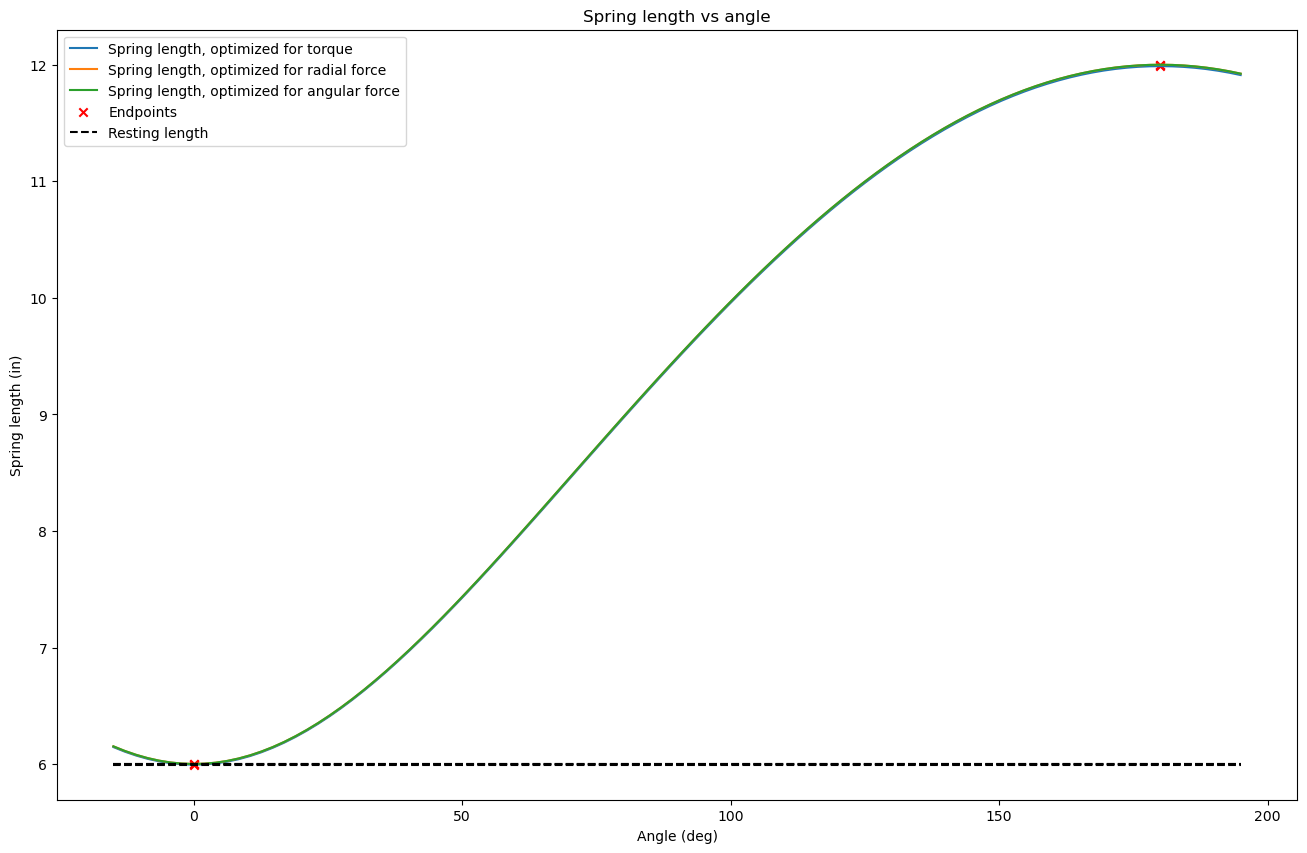

In [391]:
# Plot the spring length from 0 to 180 degrees with a 15 degree margin
angles = np.linspace(-15, 195, 100)

plt.plot(angles, torque_optimized_springlock.spring_length(angles), label='Spring length, optimized for torque')
plt.plot(angles, radial_force_optimized_springlock.spring_length(angles), label='Spring length, optimized for radial force')
plt.plot(angles, angular_force_optimized_springlock.spring_length(angles), label='Spring length, optimized for angular force')
plt.xlabel(f'Angle ({units["angle_units"]})')
plt.ylabel(f'Spring length ({units["length_units"]})')
plt.title('Spring length vs angle')
plt.scatter([0, 180], [torque_optimized_springlock.spring_length(0), torque_optimized_springlock.spring_length(180)], color='red', marker='x', label='Endpoints')
plt.plot([-15, 195], [torque_optimized_springlock.spring_resting_length, torque_optimized_springlock.spring_resting_length], color='black', linestyle='--', label='Resting length')
plt.scatter([0, 180], [radial_force_optimized_springlock.spring_length(0), radial_force_optimized_springlock.spring_length(180)], color='red', marker='x')
plt.plot([-15, 195], [radial_force_optimized_springlock.spring_resting_length, radial_force_optimized_springlock.spring_resting_length], color='black', linestyle='--')
plt.scatter([0, 180], [angular_force_optimized_springlock.spring_length(0), angular_force_optimized_springlock.spring_length(180)], color='red', marker='x')
plt.plot([-15, 195], [angular_force_optimized_springlock.spring_resting_length, angular_force_optimized_springlock.spring_resting_length], color='black', linestyle='--')
plt.gcf().set_size_inches(16, 10)
plt.legend()

plt.show()

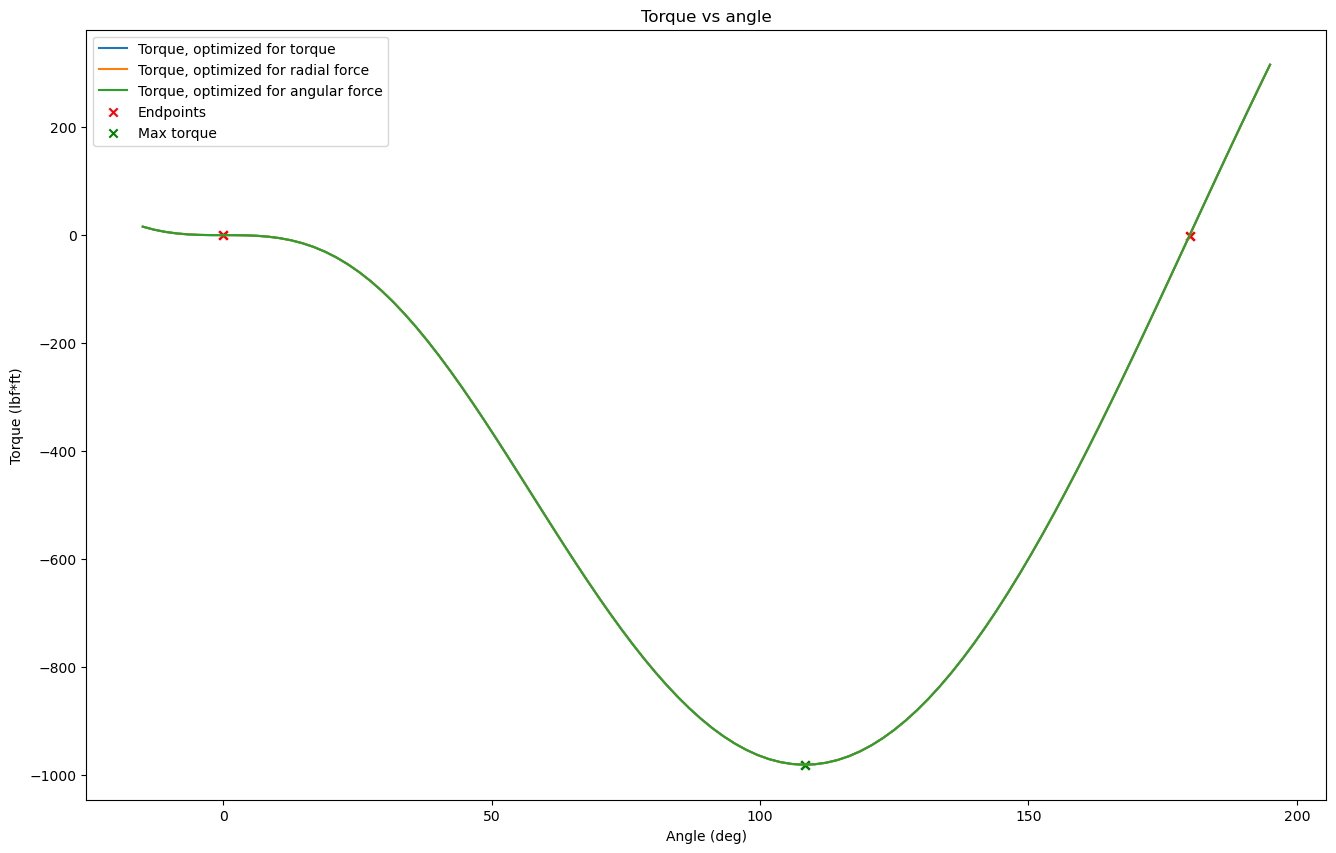

In [392]:
# Plot the torque from 0 to 180 degrees with a 15 degree margin
plt.plot(angles, torque_optimized_springlock.torque(angles), label='Torque, optimized for torque')
plt.plot(angles, radial_force_optimized_springlock.torque(angles), label='Torque, optimized for radial force')
plt.plot(angles, angular_force_optimized_springlock.torque(angles), label='Torque, optimized for angular force')
plt.xlabel(f'Angle ({units["angle_units"]})')
plt.ylabel(f'Torque ({units["torque_units"]})')
plt.title('Torque vs angle')
plt.scatter([0, 180], [torque_optimized_springlock.torque(0), torque_optimized_springlock.torque(180)], color='red', marker='x', label='Endpoints')
plt.scatter([torque_optimized_springlock.max_torque_theta], [torque_optimized_springlock.max_torque], color='green', marker='x', label='Max torque')
plt.scatter([0, 180], [radial_force_optimized_springlock.torque(0), radial_force_optimized_springlock.torque(180)], color='red', marker='x')
plt.scatter([radial_force_optimized_springlock.max_torque_theta], [radial_force_optimized_springlock.max_torque], color='green', marker='x')
plt.scatter([0, 180], [angular_force_optimized_springlock.torque(0), angular_force_optimized_springlock.torque(180)], color='red', marker='x')
plt.scatter([angular_force_optimized_springlock.max_torque_theta], [angular_force_optimized_springlock.max_torque], color='green', marker='x')
plt.gcf().set_size_inches(16, 10)
plt.legend()

plt.show()

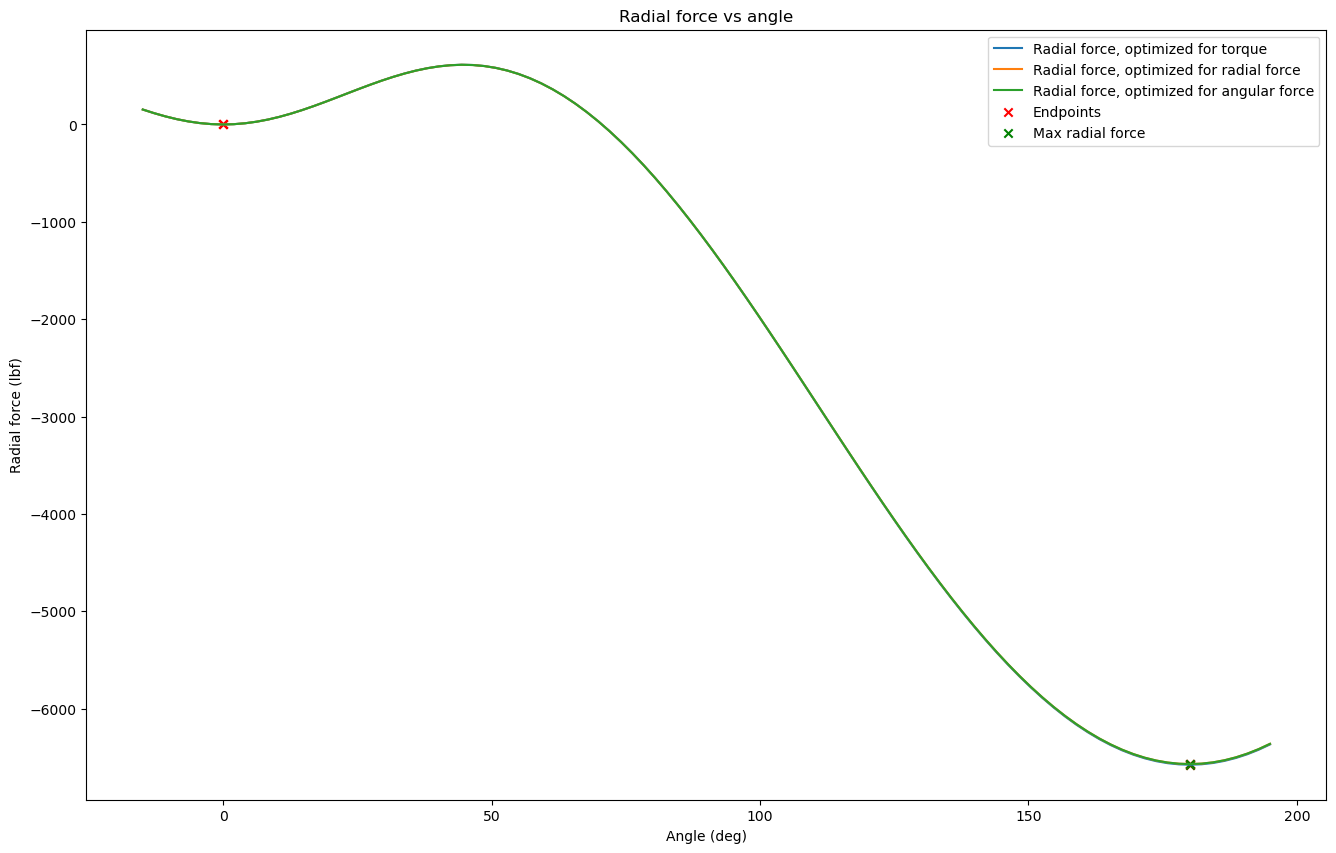

In [393]:
# Plot the radial force from 0 to 180 degrees with a 15 degree margin
plt.plot(angles, torque_optimized_springlock.radial_force(angles), label='Radial force, optimized for torque')
plt.plot(angles, radial_force_optimized_springlock.radial_force(angles), label='Radial force, optimized for radial force')
plt.plot(angles, angular_force_optimized_springlock.radial_force(angles), label='Radial force, optimized for angular force')
plt.xlabel(f'Angle ({units["angle_units"]})')
plt.ylabel(f'Radial force ({units["force_units"]})')
plt.title('Radial force vs angle')
plt.scatter([0, 180], [torque_optimized_springlock.radial_force(0), torque_optimized_springlock.radial_force(180)], color='red', marker='x', label='Endpoints')
plt.scatter([torque_optimized_springlock.max_radial_force_theta], [torque_optimized_springlock.max_radial_force], color='green', marker='x', label='Max radial force')
plt.scatter([0, 180], [radial_force_optimized_springlock.radial_force(0), radial_force_optimized_springlock.radial_force(180)], color='red', marker='x')
plt.scatter([radial_force_optimized_springlock.max_radial_force_theta], [radial_force_optimized_springlock.max_radial_force], color='green', marker='x')
plt.scatter([0, 180], [angular_force_optimized_springlock.radial_force(0), angular_force_optimized_springlock.radial_force(180)], color='red', marker='x')
plt.scatter([angular_force_optimized_springlock.max_radial_force_theta], [angular_force_optimized_springlock.max_radial_force], color='green', marker='x')
plt.gcf().set_size_inches(16, 10)
plt.legend()

plt.show()


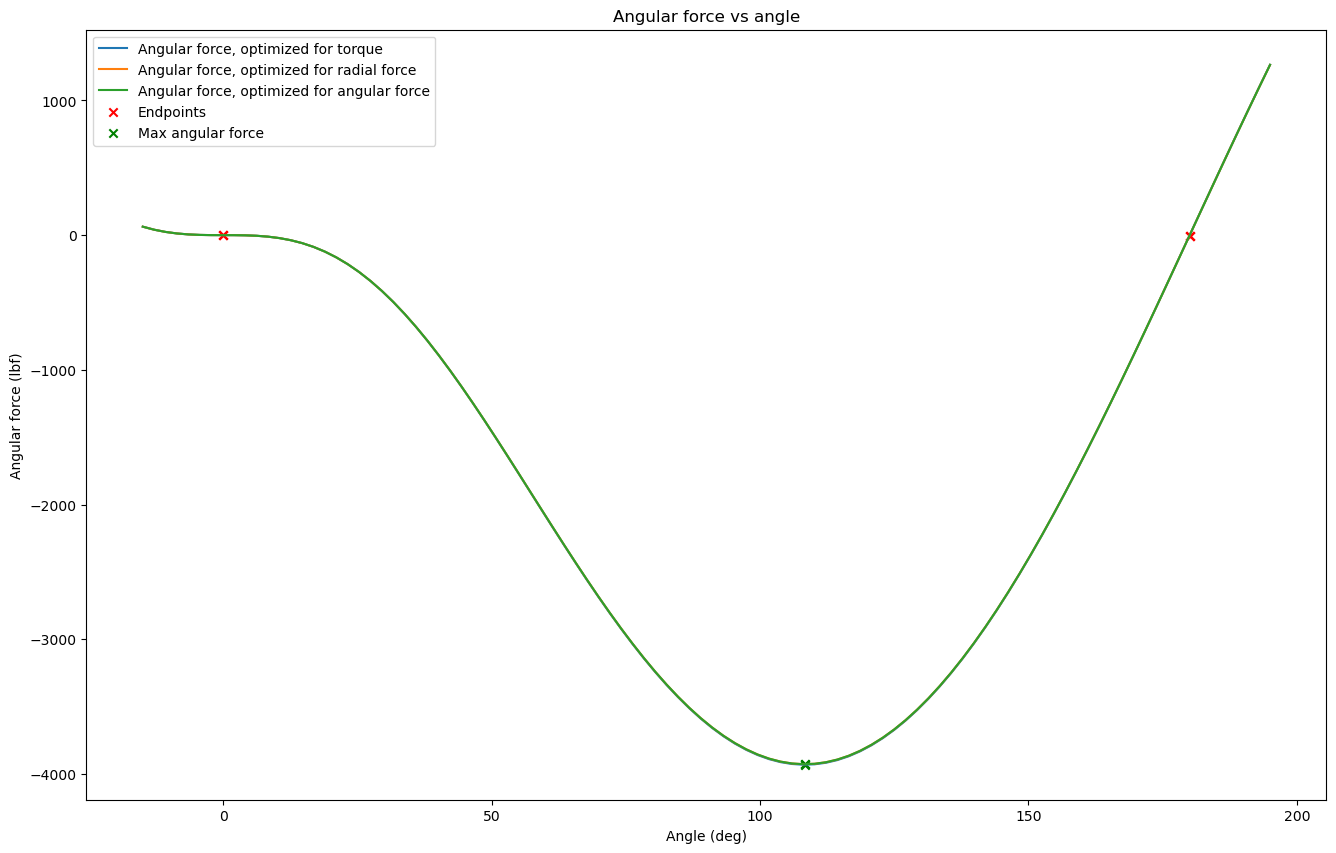

In [394]:
# Plot the angular force from 0 to 180 degrees with a 15 degree margin
plt.plot(angles, torque_optimized_springlock.angular_force(angles), label='Angular force, optimized for torque')
plt.plot(angles, radial_force_optimized_springlock.angular_force(angles), label='Angular force, optimized for radial force')
plt.plot(angles, angular_force_optimized_springlock.angular_force(angles), label='Angular force, optimized for angular force')
plt.xlabel(f'Angle ({units["angle_units"]})')
plt.ylabel(f'Angular force ({units["force_units"]})')
plt.title('Angular force vs angle')
plt.scatter([0, 180], [torque_optimized_springlock.angular_force(0), torque_optimized_springlock.angular_force(180)], color='red', marker='x', label='Endpoints')
plt.scatter([torque_optimized_springlock.max_angular_force_theta], [torque_optimized_springlock.max_angular_force], color='green', marker='x', label='Max angular force')
plt.scatter([0, 180], [radial_force_optimized_springlock.angular_force(0), radial_force_optimized_springlock.angular_force(180)], color='red', marker='x')
plt.scatter([radial_force_optimized_springlock.max_angular_force_theta], [radial_force_optimized_springlock.max_angular_force], color='green', marker='x')
plt.scatter([0, 180], [angular_force_optimized_springlock.angular_force(0), angular_force_optimized_springlock.angular_force(180)], color='red', marker='x')
plt.scatter([angular_force_optimized_springlock.max_angular_force_theta], [angular_force_optimized_springlock.max_angular_force], color='green', marker='x')
plt.legend()
plt.gcf().set_size_inches(16, 10)

plt.show()

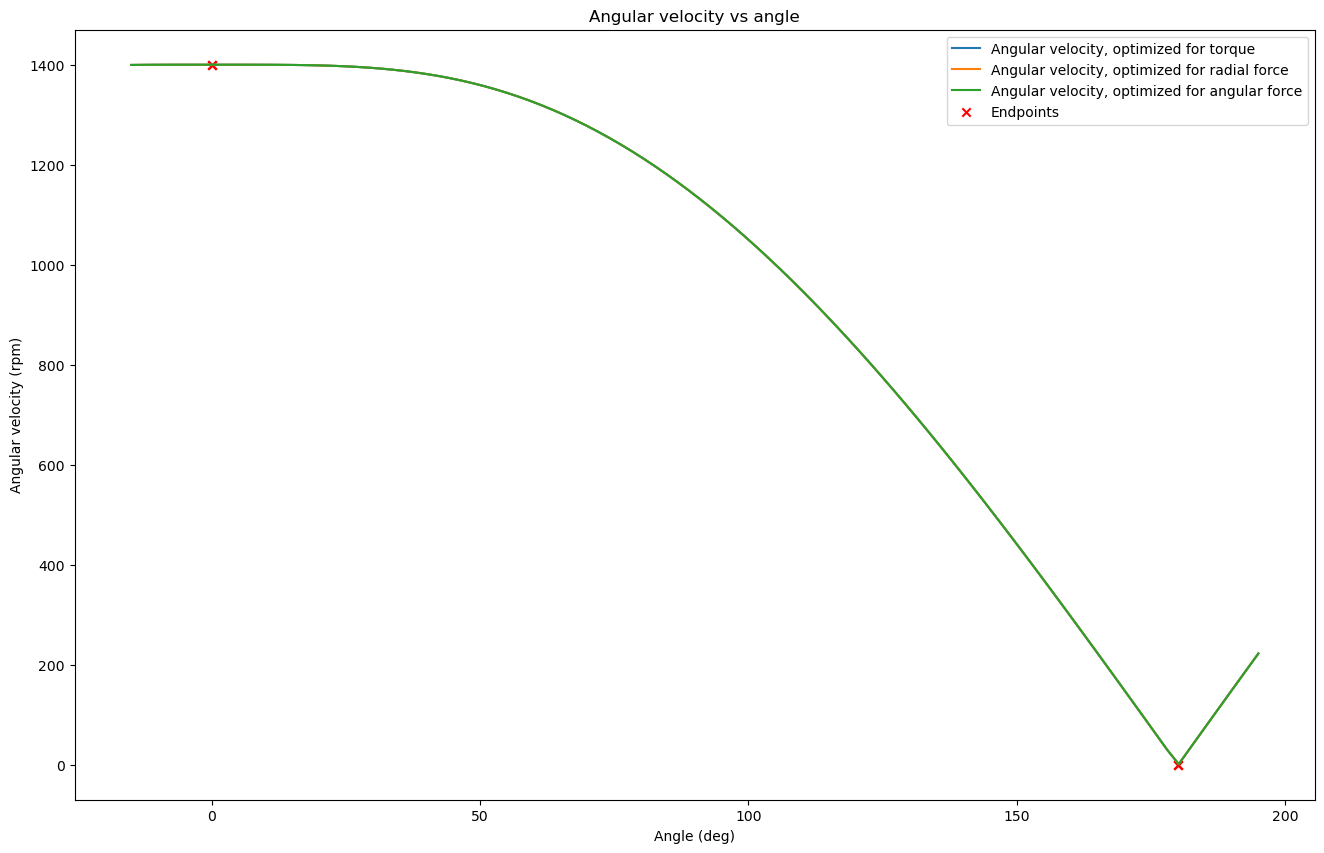

In [395]:
# Plot the angular velocity from 0 to 180 degrees with a 15 degree margin
plt.plot(angles, torque_optimized_springlock.angular_velocity(angles), label='Angular velocity, optimized for torque')
plt.plot(angles, radial_force_optimized_springlock.angular_velocity(angles), label='Angular velocity, optimized for radial force')
plt.plot(angles, angular_force_optimized_springlock.angular_velocity(angles), label='Angular velocity, optimized for angular force')
plt.xlabel(f'Angle ({units["angle_units"]})')
plt.ylabel(f'Angular velocity ({units["angular_velocity_units"]})')
plt.title('Angular velocity vs angle')
plt.scatter([0, 180], [torque_optimized_springlock.angular_velocity(0), torque_optimized_springlock.angular_velocity(180)], color='red', marker='x', label='Endpoints')
plt.scatter([0, 180], [radial_force_optimized_springlock.angular_velocity(0), radial_force_optimized_springlock.angular_velocity(180)], color='red', marker='x')
plt.scatter([0, 180], [angular_force_optimized_springlock.angular_velocity(0), angular_force_optimized_springlock.angular_velocity(180)], color='red', marker='x')
plt.legend()
plt.gcf().set_size_inches(16, 10)

plt.show()

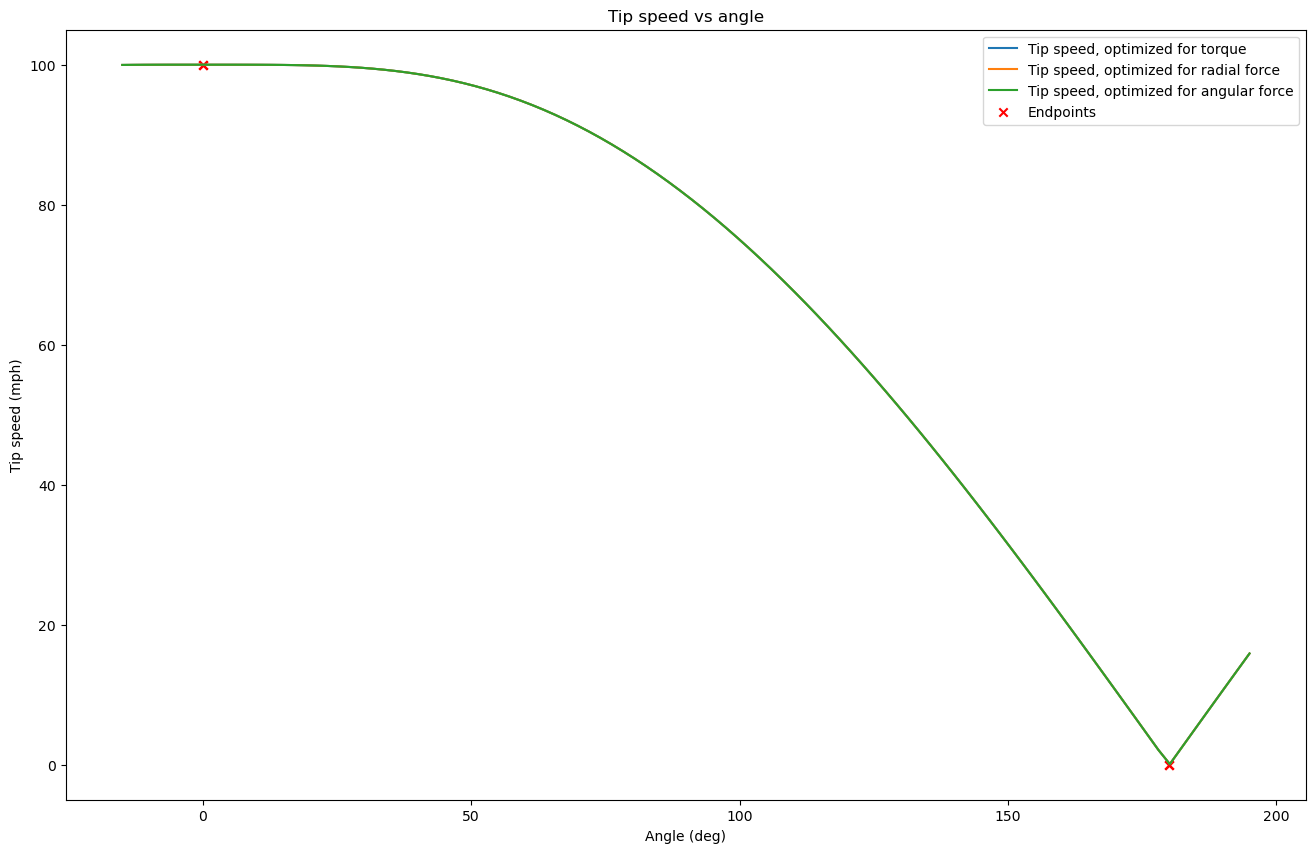

In [396]:
# Plot the tip speed from 0 to 180 degrees with a 15 degree margin
plt.plot(angles, torque_optimized_springlock.tip_speed(angles), label='Tip speed, optimized for torque')
plt.plot(angles, radial_force_optimized_springlock.tip_speed(angles), label='Tip speed, optimized for radial force')
plt.plot(angles, angular_force_optimized_springlock.tip_speed(angles), label='Tip speed, optimized for angular force')
plt.xlabel(f'Angle ({units["angle_units"]})')
plt.ylabel(f'Tip speed ({units["speed_units"]})')
plt.title('Tip speed vs angle')
plt.scatter([0, 180], [torque_optimized_springlock.tip_speed(0), torque_optimized_springlock.tip_speed(180)], color='red', marker='x', label='Endpoints')
plt.scatter([0, 180], [radial_force_optimized_springlock.tip_speed(0), radial_force_optimized_springlock.tip_speed(180)], color='red', marker='x')
plt.scatter([0, 180], [angular_force_optimized_springlock.tip_speed(0), angular_force_optimized_springlock.tip_speed(180)], color='red', marker='x')
plt.legend()
plt.gcf().set_size_inches(16, 10)

plt.show()


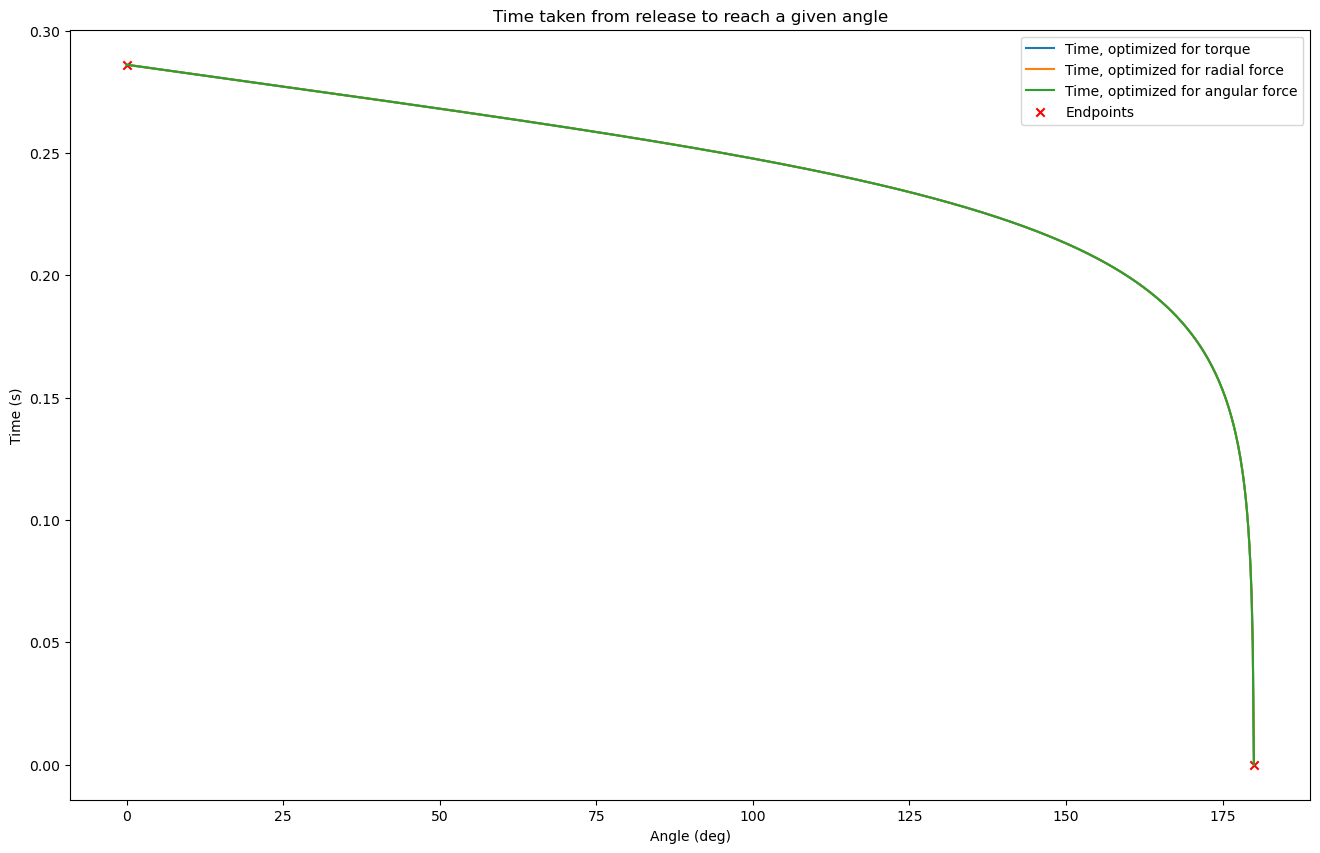

In [397]:
# Plot the time that it takes the tip to reach a given angle
angles_2 = np.linspace(0, 180, 1000)
torque_times = np.zeros_like(angles_2)
radial_force_times = np.zeros_like(angles_2)
angular_force_times = np.zeros_like(angles_2)

# Use trapazoidal approximation to fill out the times array
for i in range(1, len(angles_2)):
    torque_times[i] = torque_times[i - 1] - (angles_2[i] - angles_2[i - 1]) / (torque_optimized_springlock.angular_velocity(angles_2[i]) + torque_optimized_springlock.angular_velocity(angles_2[i - 1]))
    radial_force_times[i] = radial_force_times[i - 1] - (angles_2[i] - angles_2[i - 1]) / (radial_force_optimized_springlock.angular_velocity(angles_2[i]) + radial_force_optimized_springlock.angular_velocity(angles_2[i - 1]))
    angular_force_times[i] = angular_force_times[i - 1] - (angles_2[i] - angles_2[i - 1]) / (angular_force_optimized_springlock.angular_velocity(angles_2[i]) + angular_force_optimized_springlock.angular_velocity(angles_2[i - 1]))


torque_times = [i - torque_times[-1] for i in torque_times]
radial_force_times = [i - radial_force_times[-1] for i in radial_force_times]
angular_force_times = [i - angular_force_times[-1] for i in angular_force_times]

plt.plot(angles_2, torque_times, label='Time, optimized for torque')
plt.plot(angles_2, radial_force_times, label='Time, optimized for radial force')
plt.plot(angles_2, angular_force_times, label='Time, optimized for angular force')
plt.xlabel(f'Angle ({units["angle_units"]})')
plt.ylabel('Time (s)')
plt.title('Time taken from release to reach a given angle')
plt.scatter([0, 180], [torque_times[0], torque_times[-1]], color='red', marker='x', label='Endpoints')
plt.legend()
plt.gcf().set_size_inches(16, 10)

plt.show()

In [398]:
# Get an optimized springlock system for each of the three weights for 25 speeds between 0 and 125 mph
speeds = np.linspace(1, 125, 25)

torque_optimized_springlocks = []
radial_force_optimized_springlocks = []
angular_force_optimized_springlocks = []

for i in tqdm(speeds):
    springlock, _ = optimize_springlock(i, torque_weight=1, radial_force_weight=0, angular_force_weight=0, **units)
    torque_optimized_springlocks.append(springlock)

    springlock, _ = optimize_springlock(i, torque_weight=0, radial_force_weight=1, angular_force_weight=0, **units)
    radial_force_optimized_springlocks.append(springlock)

    springlock, _ = optimize_springlock(i, torque_weight=0, radial_force_weight=0, angular_force_weight=1, **units)
    angular_force_optimized_springlocks.append(springlock)

100%|██████████| 25/25 [00:16<00:00,  1.49it/s]


In [399]:
# Plot a best fit curve for the optimized torques, spring arm lengths, spring resting lengths, spring constants, maximum radial force, and maximum angular force
def quadratic(x, a, b, c):
    return a * x ** 2 + b * x + c

popt_torque_torque, _ = curve_fit(quadratic, speeds, [abs(springlock.max_torque) for springlock in torque_optimized_springlocks])
popt_torque_spring_arm_length, _ = curve_fit(quadratic, speeds, [springlock.spring_arm_length for springlock in torque_optimized_springlocks])
popt_torque_spring_resting_length, _ = curve_fit(quadratic, speeds, [springlock.spring_resting_length for springlock in torque_optimized_springlocks])
popt_torque_spring_constant, _ = curve_fit(quadratic, speeds, [springlock.spring_constant for springlock in torque_optimized_springlocks])
popt_torque_max_radial_force, _ = curve_fit(quadratic, speeds, [abs(springlock.max_radial_force) for springlock in torque_optimized_springlocks])
popt_torque_max_angular_force, _ = curve_fit(quadratic, speeds, [springlock.max_angular_force for springlock in torque_optimized_springlocks])

popt_radial_force_torque, _ = curve_fit(quadratic, speeds, [abs(springlock.max_torque) for springlock in radial_force_optimized_springlocks])
popt_radial_force_spring_arm_length, _ = curve_fit(quadratic, speeds, [springlock.spring_arm_length for springlock in radial_force_optimized_springlocks])
popt_radial_force_spring_resting_length, _ = curve_fit(quadratic, speeds, [springlock.spring_resting_length for springlock in radial_force_optimized_springlocks])
popt_radial_force_spring_constant, _ = curve_fit(quadratic, speeds, [springlock.spring_constant for springlock in radial_force_optimized_springlocks])
popt_radial_force_max_radial_force, _ = curve_fit(quadratic, speeds, [abs(springlock.max_radial_force) for springlock in radial_force_optimized_springlocks])
popt_radial_force_max_angular_force, _ = curve_fit(quadratic, speeds, [springlock.max_angular_force for springlock in radial_force_optimized_springlocks])

popt_angular_force_torque, _ = curve_fit(quadratic, speeds, [abs(springlock.max_torque) for springlock in angular_force_optimized_springlocks])
popt_angular_force_spring_arm_length, _ = curve_fit(quadratic, speeds, [springlock.spring_arm_length for springlock in angular_force_optimized_springlocks])
popt_angular_force_spring_resting_length, _ = curve_fit(quadratic, speeds, [springlock.spring_resting_length for springlock in angular_force_optimized_springlocks])
popt_angular_force_spring_constant, _ = curve_fit(quadratic, speeds, [springlock.spring_constant for springlock in angular_force_optimized_springlocks])
popt_angular_force_max_radial_force, _ = curve_fit(quadratic, speeds, [abs(springlock.max_radial_force) for springlock in angular_force_optimized_springlocks])
popt_angular_force_max_angular_force, _ = curve_fit(quadratic, speeds, [springlock.max_angular_force for springlock in angular_force_optimized_springlocks])


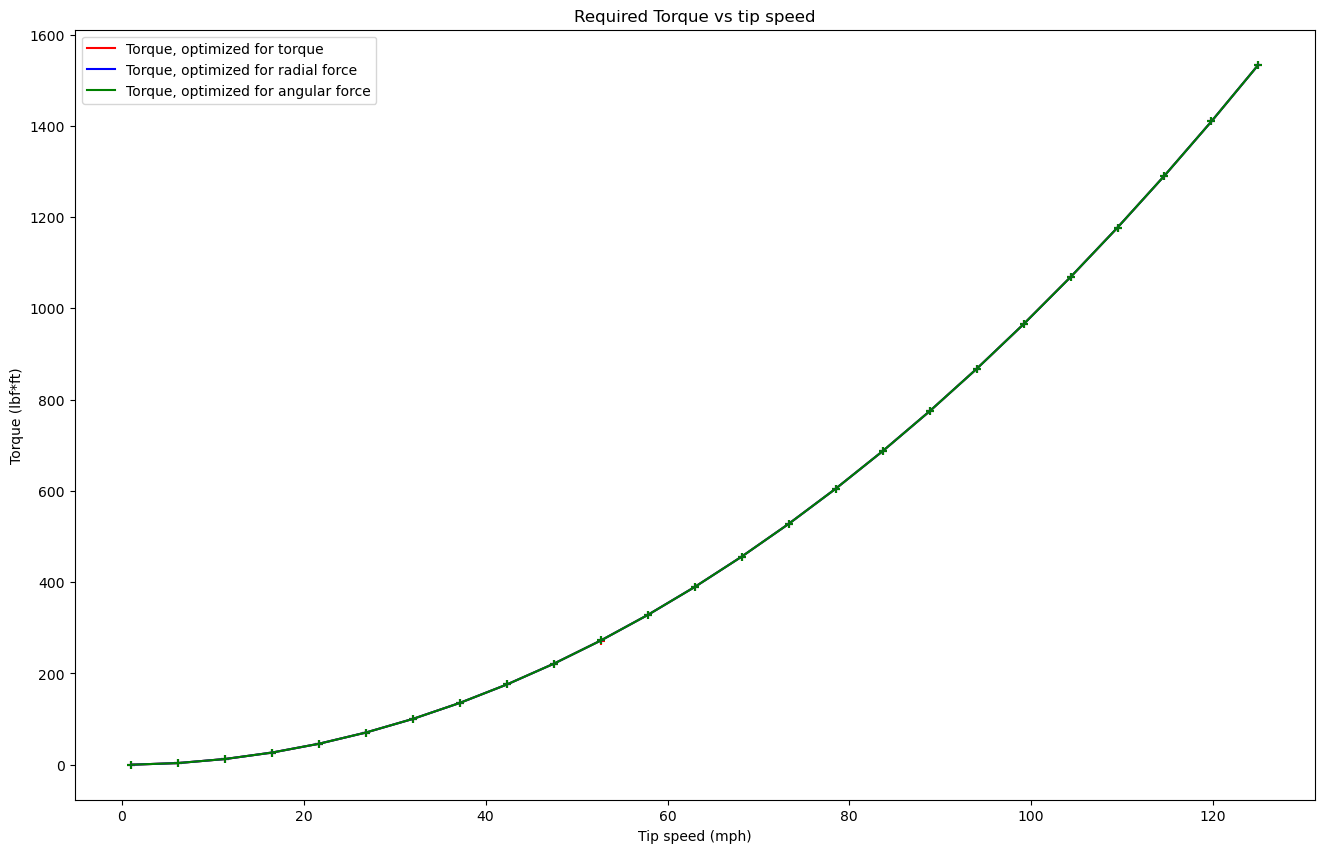

In [400]:
# Plot a scatter plot of the optimized torques
plt.plot(speeds, quadratic(speeds, *popt_torque_torque), label='Torque, optimized for torque', color='red')
plt.scatter(speeds, list(map(lambda x: abs(x.max_torque), torque_optimized_springlocks)), label='', color='red', marker='+')
plt.plot(speeds, quadratic(speeds, *popt_radial_force_torque), label='Torque, optimized for radial force', color='blue')
plt.scatter(speeds, list(map(lambda x: abs(x.max_torque), radial_force_optimized_springlocks)), label='', color='blue', marker='+')
plt.plot(speeds, quadratic(speeds, *popt_angular_force_torque), label='Torque, optimized for angular force', color='green')
plt.scatter(speeds, list(map(lambda x: abs(x.max_torque), angular_force_optimized_springlocks)), label='', color='green', marker='+')
plt.xlabel(f'Tip speed ({units["speed_units"]})')
plt.ylabel(f'Torque ({units["torque_units"]})')
plt.title('Required Torque vs tip speed')
plt.legend()
plt.gcf().set_size_inches(16, 10)

plt.show()


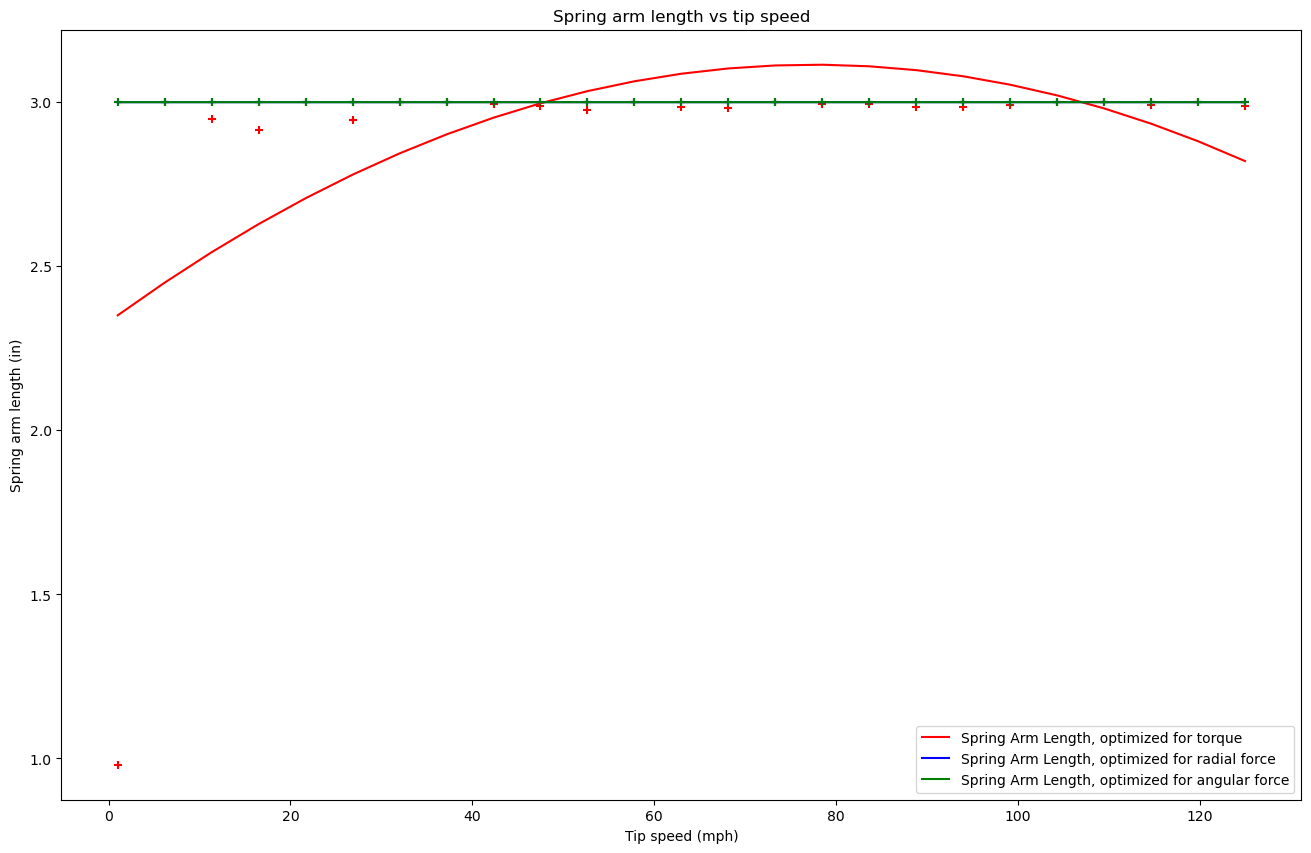

In [401]:
# Plot a scatter plot of the optimized spring arm lengths
plt.plot(speeds, quadratic(speeds, *popt_torque_spring_arm_length), label='Spring Arm Length, optimized for torque', color='red')
plt.scatter(speeds, list(map(lambda x: x.spring_arm_length, torque_optimized_springlocks)), label='', color='red', marker='+')
plt.plot(speeds, quadratic(speeds, *popt_radial_force_spring_arm_length), label='Spring Arm Length, optimized for radial force', color='blue')
plt.scatter(speeds, list(map(lambda x: x.spring_arm_length, radial_force_optimized_springlocks)), label='', color='blue', marker='+')
plt.plot(speeds, quadratic(speeds, *popt_angular_force_spring_arm_length), label='Spring Arm Length, optimized for angular force', color='green')
plt.scatter(speeds, list(map(lambda x: x.spring_arm_length, angular_force_optimized_springlocks)), label='', color='green', marker='+')
plt.xlabel(f'Tip speed ({units["speed_units"]})')
plt.ylabel(f'Spring arm length ({units["length_units"]})')
plt.title('Spring arm length vs tip speed')
plt.legend()
plt.gcf().set_size_inches(16, 10)

plt.show()

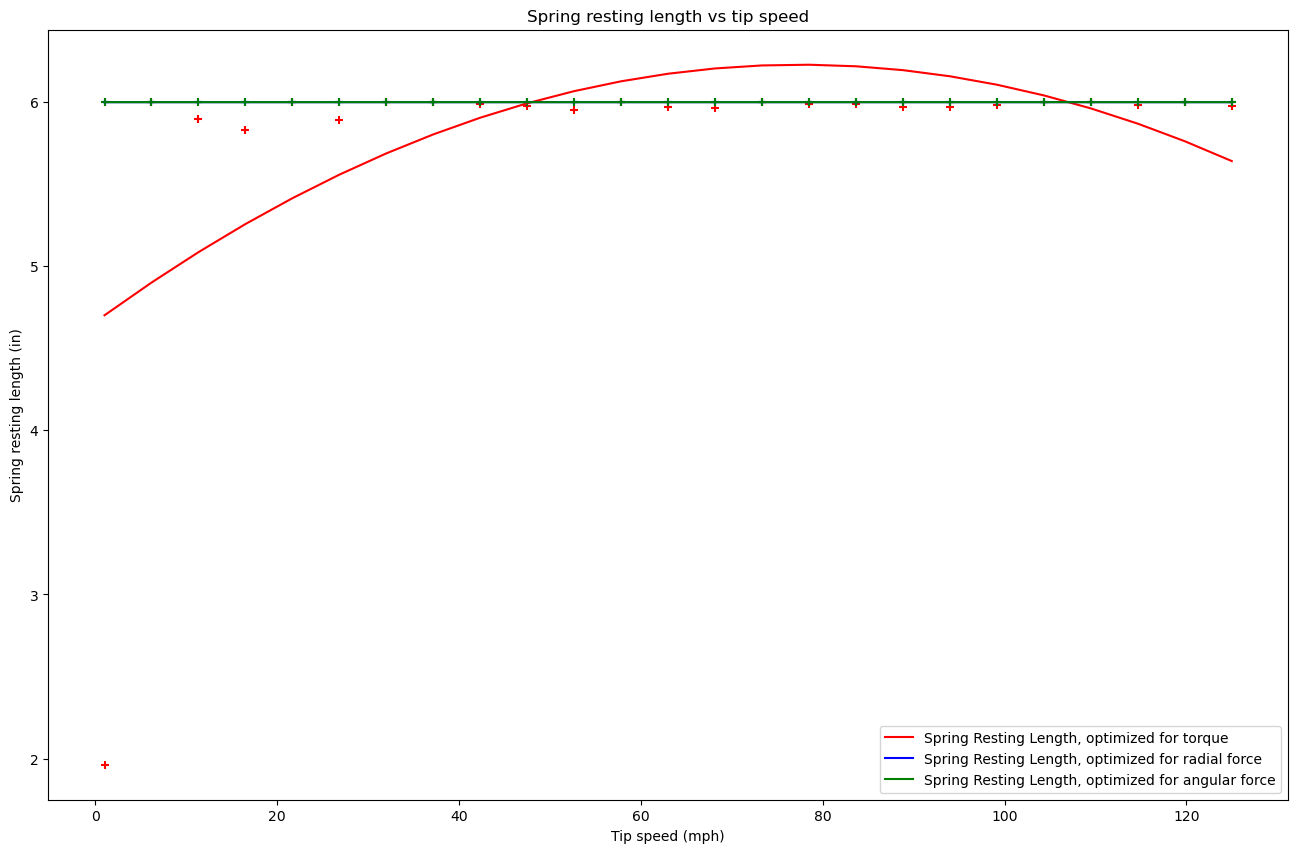

In [402]:
# Plot a scatter plot of the optimized spring resting lengths
plt.plot(speeds, quadratic(speeds, *popt_torque_spring_resting_length), label='Spring Resting Length, optimized for torque', color='red')
plt.scatter(speeds, list(map(lambda x: x.spring_resting_length, torque_optimized_springlocks)), label='', color='red', marker='+')
plt.plot(speeds, quadratic(speeds, *popt_radial_force_spring_resting_length), label='Spring Resting Length, optimized for radial force', color='blue')
plt.scatter(speeds, list(map(lambda x: x.spring_resting_length, radial_force_optimized_springlocks)), label='', color='blue', marker='+')
plt.plot(speeds, quadratic(speeds, *popt_angular_force_spring_resting_length), label='Spring Resting Length, optimized for angular force', color='green')
plt.scatter(speeds, list(map(lambda x: x.spring_resting_length, angular_force_optimized_springlocks)), label='', color='green', marker='+')
plt.xlabel(f'Tip speed ({units["speed_units"]})')
plt.ylabel(f'Spring resting length ({units["length_units"]})')
plt.title('Spring resting length vs tip speed')
plt.legend()
plt.gcf().set_size_inches(16, 10)

plt.show()

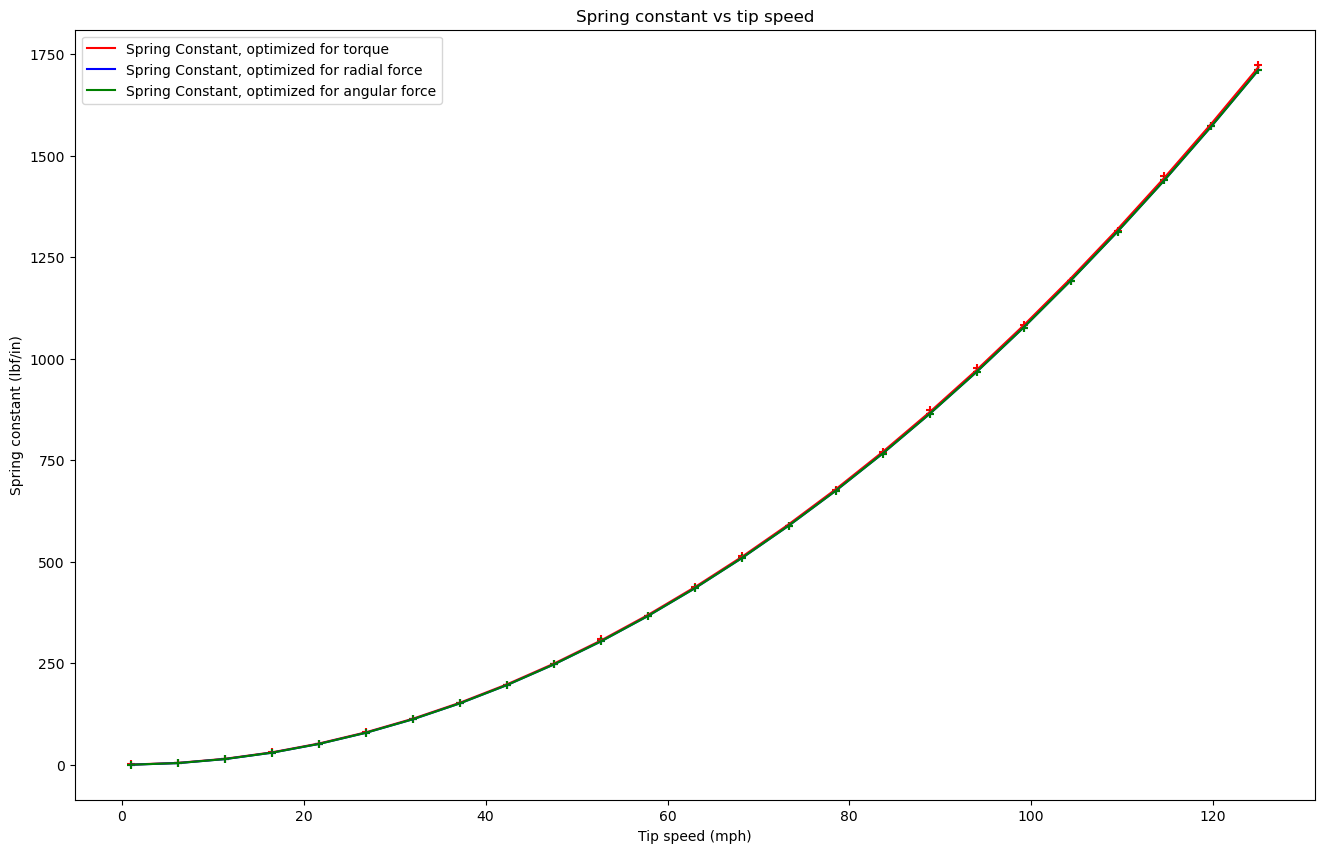

In [403]:
# Plot a scatter plot of the optimized spring constants
plt.plot(speeds, quadratic(speeds, *popt_torque_spring_constant), label='Spring Constant, optimized for torque', color='red')
plt.scatter(speeds, list(map(lambda x: x.spring_constant, torque_optimized_springlocks)), label='', color='red', marker='+')
plt.plot(speeds, quadratic(speeds, *popt_radial_force_spring_constant), label='Spring Constant, optimized for radial force', color='blue')
plt.scatter(speeds, list(map(lambda x: x.spring_constant, radial_force_optimized_springlocks)), label='', color='blue', marker='+')
plt.plot(speeds, quadratic(speeds, *popt_angular_force_spring_constant), label='Spring Constant, optimized for angular force', color='green')
plt.scatter(speeds, list(map(lambda x: x.spring_constant, angular_force_optimized_springlocks)), label='', color='green', marker='+')
plt.xlabel(f'Tip speed ({units["speed_units"]})')
plt.ylabel(f'Spring constant ({units["spring_constant_units"]})')
plt.title('Spring constant vs tip speed')
plt.legend()
plt.gcf().set_size_inches(16, 10)

plt.show()

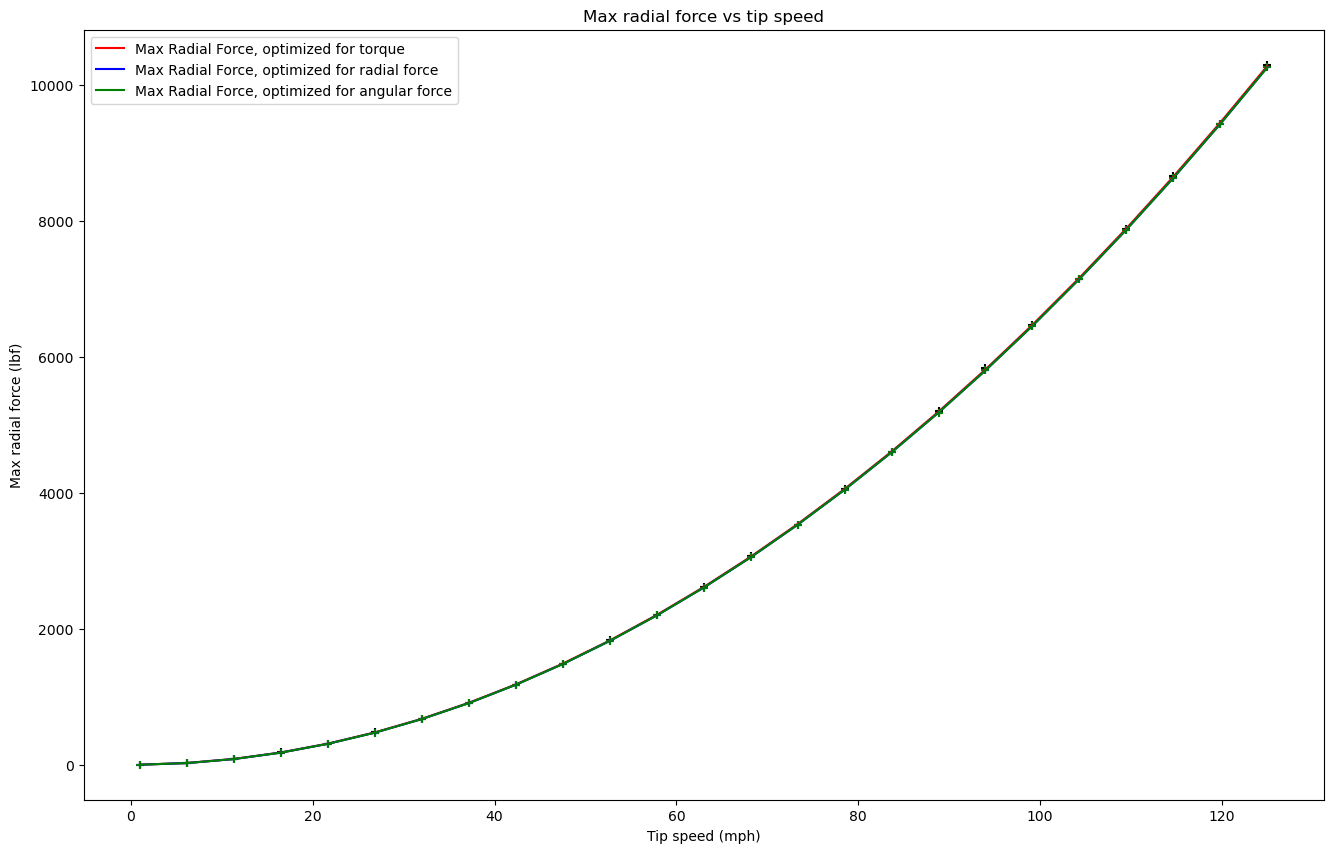

In [404]:
# Plot a scatter plot of the optimized maximum radial forces
plt.plot(speeds, quadratic(speeds, *popt_torque_max_radial_force), label='Max Radial Force, optimized for torque', color='red')
plt.scatter(speeds, list(map(lambda x: abs(x.max_radial_force), torque_optimized_springlocks)), label='', color='black', marker='+')
plt.plot(speeds, quadratic(speeds, *popt_radial_force_max_radial_force), label='Max Radial Force, optimized for radial force', color='blue')
plt.scatter(speeds, list(map(lambda x: abs(x.max_radial_force), radial_force_optimized_springlocks)), label='', color='blue', marker='+')
plt.plot(speeds, quadratic(speeds, *popt_angular_force_max_radial_force), label='Max Radial Force, optimized for angular force', color='green')
plt.scatter(speeds, list(map(lambda x: abs(x.max_radial_force), angular_force_optimized_springlocks)), label='', color='green', marker='+')
plt.xlabel(f'Tip speed ({units["speed_units"]})')
plt.ylabel(f'Max radial force ({units["force_units"]})')
plt.title('Max radial force vs tip speed')
plt.legend()
plt.gcf().set_size_inches(16, 10)

plt.show()

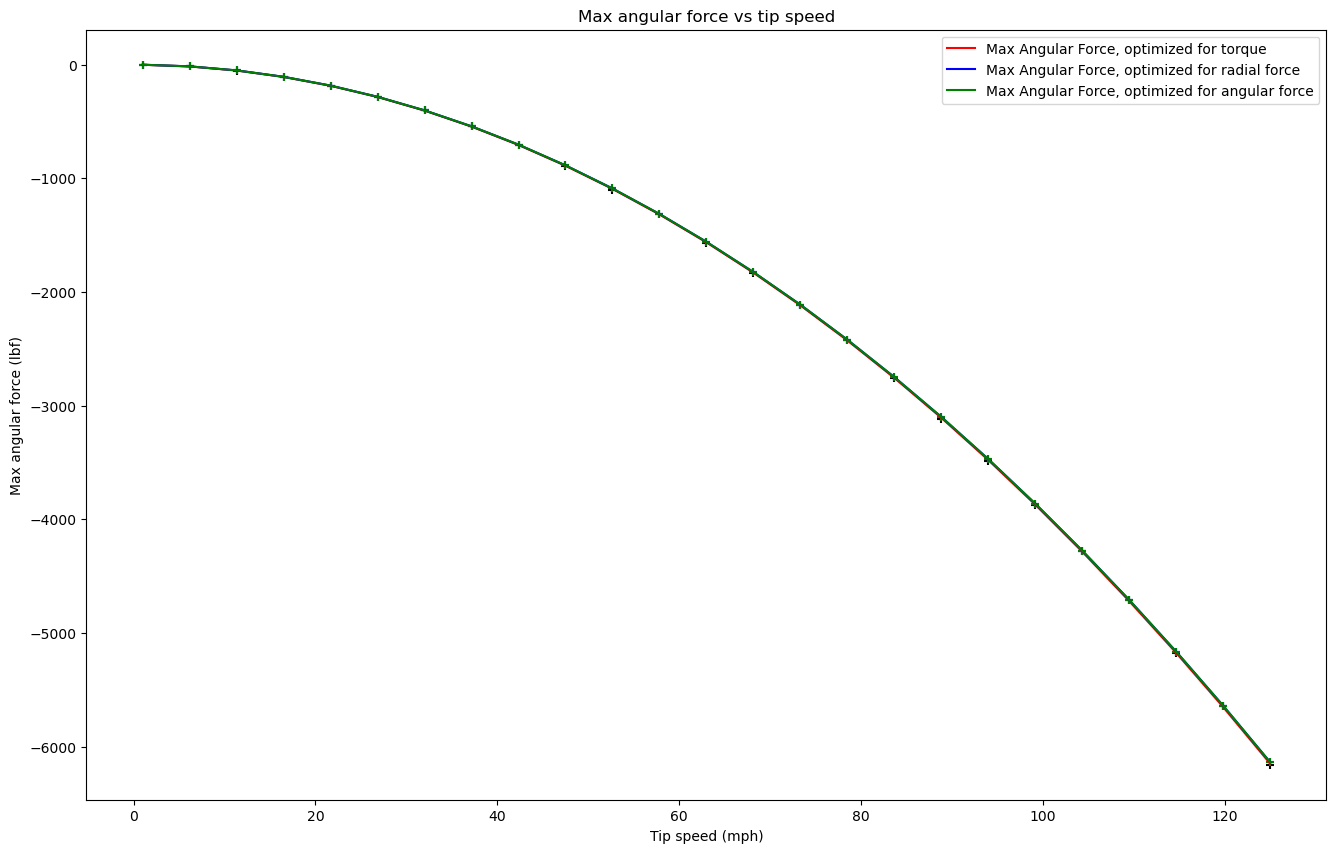

In [405]:
# Plot a scatter plot of the optimized maximum angular forces
plt.plot(speeds, quadratic(speeds, *popt_torque_max_angular_force), label='Max Angular Force, optimized for torque', color='red')
plt.scatter(speeds, list(map(lambda x: x.max_angular_force, torque_optimized_springlocks)), label='', color='black', marker='+')
plt.plot(speeds, quadratic(speeds, *popt_radial_force_max_angular_force), label='Max Angular Force, optimized for radial force', color='blue')
plt.scatter(speeds, list(map(lambda x: x.max_angular_force, radial_force_optimized_springlocks)), label='', color='blue', marker='+')
plt.plot(speeds, quadratic(speeds, *popt_angular_force_max_angular_force), label='Max Angular Force, optimized for angular force', color='green')
plt.scatter(speeds, list(map(lambda x: x.max_angular_force, angular_force_optimized_springlocks)), label='', color='green', marker='+')
plt.xlabel(f'Tip speed ({units["speed_units"]})')
plt.ylabel(f'Max angular force ({units["force_units"]})')
plt.title('Max angular force vs tip speed')
plt.legend()
plt.gcf().set_size_inches(16, 10)

plt.show()